# Introduction

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_theme()

In [2]:
#Read data from csv

#Article
articles_df = pd.read_csv("./data/articles.csv")
articles_df.head(3)


,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.


In [3]:
#Customers
customers_df = pd.read_csv("./data/customers.csv")
customers_df.head(3)

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...


In [4]:
print("ARTICLES:", articles_df.shape)
print("CUSTOMERS:", customers_df.shape)

ARTICLES: (105542, 25)
CUSTOMERS: (1371980, 7)


# Preprocessing

## Articles

In [5]:
articles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

In [6]:
# Checking missing values
articles_df.isna().sum()

article_id                        0
product_code                      0
prod_name                         0
product_type_no                   0
product_type_name                 0
product_group_name                0
graphical_appearance_no           0
graphical_appearance_name         0
colour_group_code                 0
colour_group_name                 0
perceived_colour_value_id         0
perceived_colour_value_name       0
perceived_colour_master_id        0
perceived_colour_master_name      0
department_no                     0
department_name                   0
index_code                        0
index_name                        0
index_group_no                    0
index_group_name                  0
section_no                        0
section_name                      0
garment_group_no                  0
garment_group_name                0
detail_desc                     416
dtype: int64

In [7]:
## There are 416 missing values in "Detail desc" feature => We have to replace them by "No description"
articles_df.fillna(value="No Description", inplace=True)


In [8]:
def unique_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()
        uniques.append(unique)
    tt['Uniques'] = uniques
    return tt

# Checking unique values
unique_values(articles_df)

,Total,Uniques
article_id,105542,105542
product_code,105542,47224
prod_name,105542,45875
product_type_no,105542,132
product_type_name,105542,131
product_group_name,105542,19
graphical_appearance_no,105542,30
graphical_appearance_name,105542,30
colour_group_code,105542,50
colour_group_name,105542,50


## Customer

In [9]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


In [10]:
# Checking missing values
customers_df.isna().sum()

customer_id                    0
FN                        895050
Active                    907576
club_member_status          6062
fashion_news_frequency     16009
age                        15861
postal_code                    0
dtype: int64

=> Only customer id and postal code are completely filled. Age, fashion news frequency have arounfd 1% misssing data, FN has 65% missing and Active has 66% missing data.

In [11]:
# Checking unique values
unique_values(customers_df)

,Total,Uniques
customer_id,1371980,1371980
FN,476930,1
Active,464404,1
club_member_status,1365918,3
fashion_news_frequency,1355971,4
age,1356119,84
postal_code,1371980,352899


# Data exploring

## Articles data


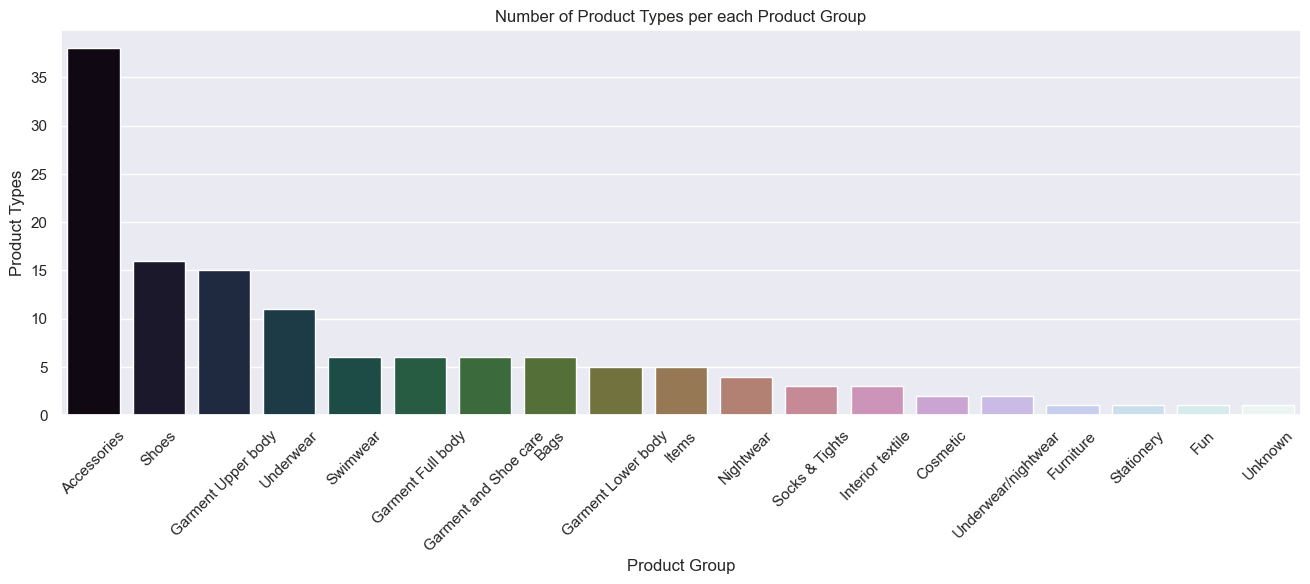

In [12]:
#Number of Product Types per each Product Group
temp = articles_df.groupby(["product_group_name"])["product_type_name"].nunique()
df = pd.DataFrame({"Product Group": temp.index, "Product Types": temp.values})
df = df.sort_values(["Product Types"], ascending=False)
plt.figure(figsize=(16, 5))
plt.title("Number of Product Types per each Product Group")
s = sns.barplot(x="Product Group", y="Product Types", data=df, palette="cubehelix")
s.set_xticklabels(s.get_xticklabels(), rotation=45)
locs, labels = plt.xticks()
plt.show()

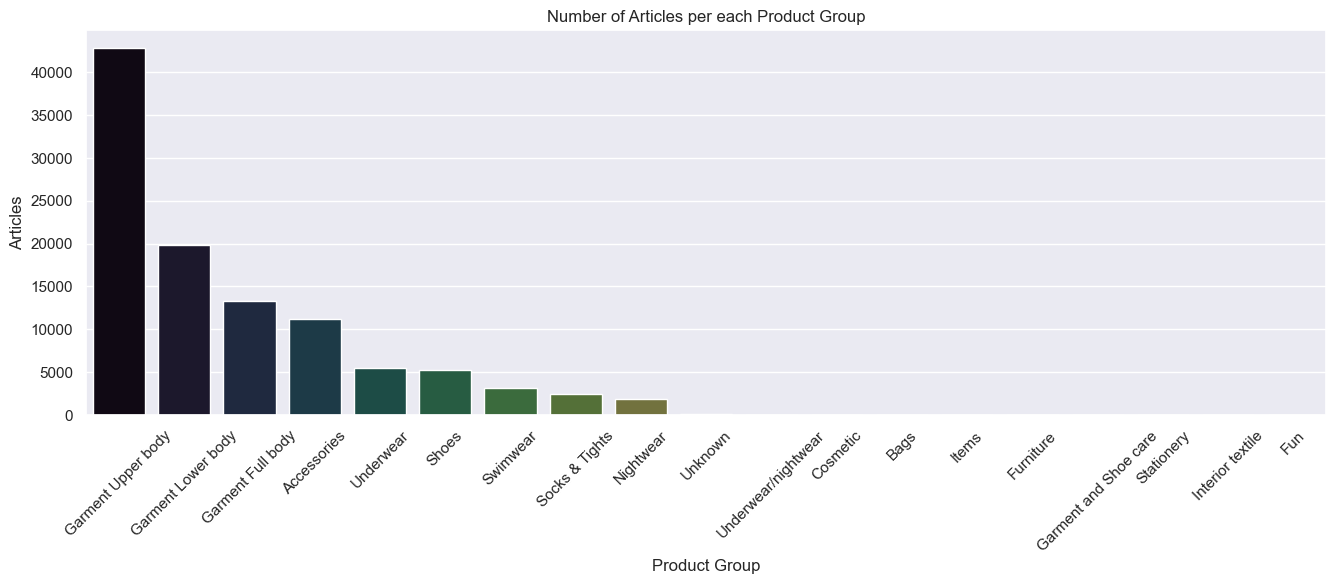

In [13]:
#Number of Articles per each Product Group
temp = articles_df.groupby(["product_group_name"])["article_id"].nunique()
df = pd.DataFrame({"Product Group": temp.index, "Articles": temp.values})
df = df.sort_values(["Articles"], ascending=False)
plt.figure(figsize=(16, 5))
plt.title("Number of Articles per each Product Group")
s = sns.barplot(x="Product Group", y="Articles", data=df, palette="cubehelix")
s.set_xticklabels(s.get_xticklabels(), rotation=45)
locs, labels = plt.xticks()
plt.show()

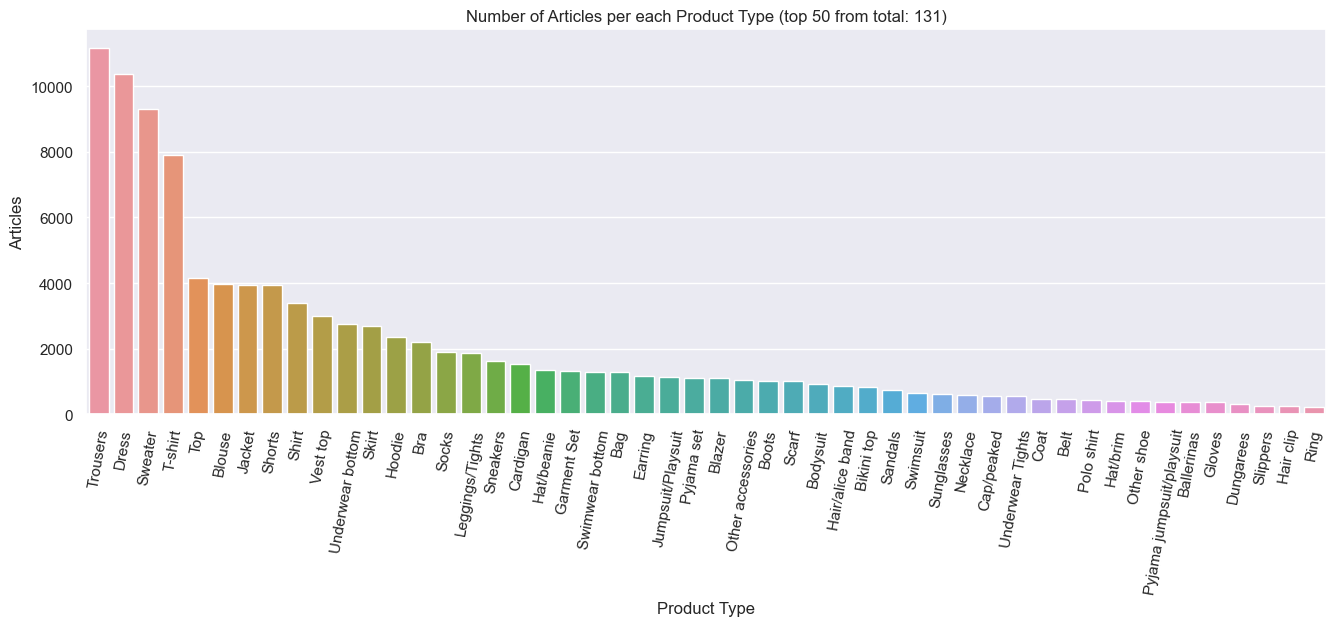

In [14]:
#Number of Articles per each Product Type
temp = articles_df.groupby(["product_type_name"])["article_id"].nunique()
df = pd.DataFrame({'Product Type': temp.index,
                   'Articles': temp.values
                  })
total_types = len(df['Product Type'].unique())
df = df.sort_values(['Articles'], ascending=False)[0:50]
plt.figure(figsize = (16,5))
plt.title(f'Number of Articles per each Product Type (top 50 from total: {total_types})')
s = sns.barplot(x = 'Product Type', y="Articles", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=80)
locs, labels = plt.xticks()
plt.show()

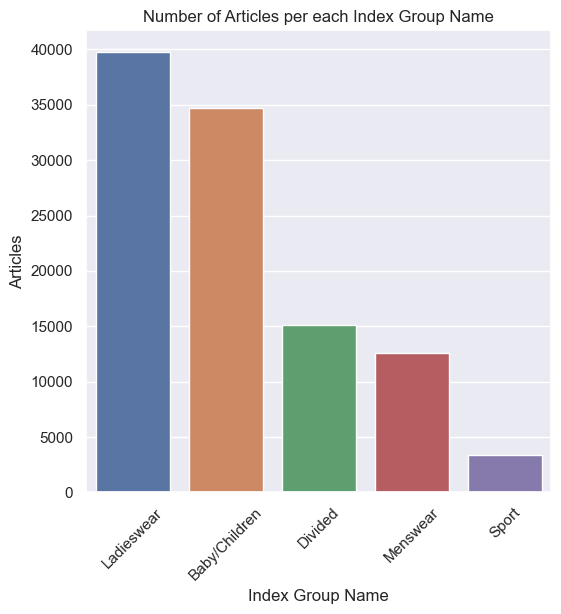

In [26]:
#Number of Articles per each Index Group Name
temp = articles_df.groupby(["index_group_name"])["article_id"].nunique()
df = pd.DataFrame({'Index Group Name': temp.index,
                   'Articles': temp.values
                  })
df = df.sort_values(['Articles'], ascending=False)
plt.figure(figsize = (6,6))
plt.title(f'Number of Articles per each Index Group Name')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Index Group Name', y="Articles", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=45)
locs, labels = plt.xticks()
plt.show()

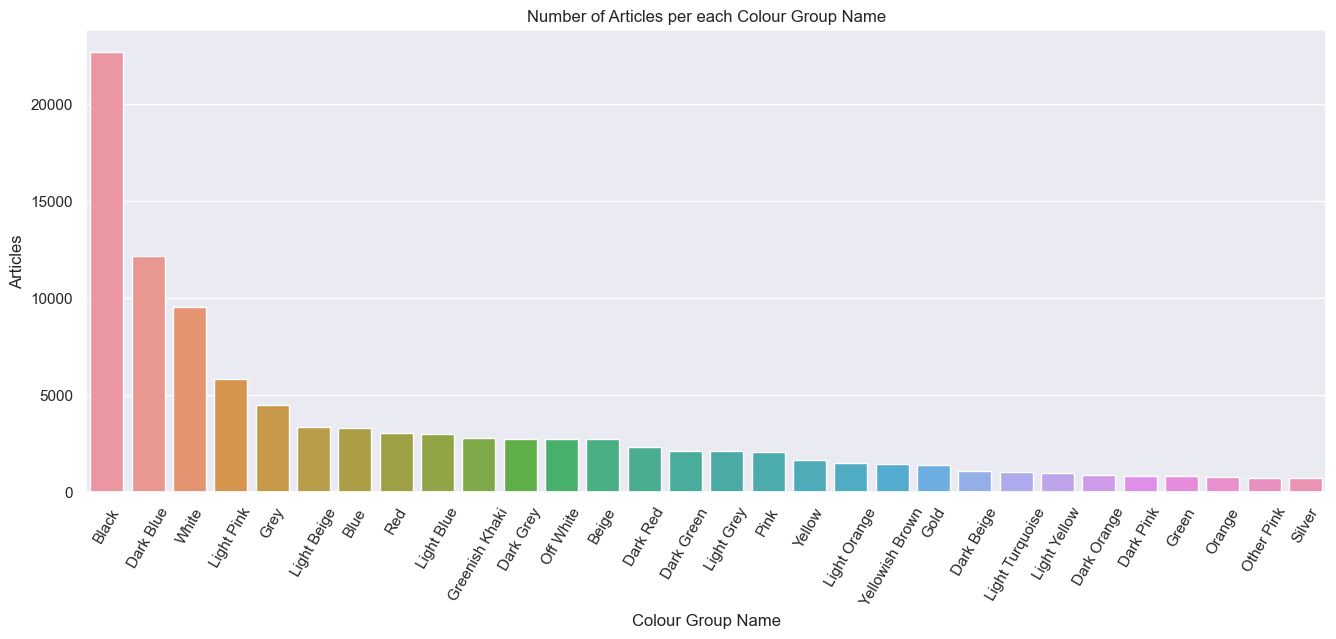

In [27]:
#Number of Articles per each Colour Group Name top 30
temp = articles_df.groupby(["colour_group_name"])["article_id"].nunique()
df = pd.DataFrame({'Colour Group Name': temp.index,
                   'Articles': temp.values
                  })
df = df.sort_values(['Articles'], ascending=False)[:30]
plt.figure(figsize = (16,6))
plt.title(f'Number of Articles per each Colour Group Name')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Colour Group Name', y="Articles", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=60)
locs, labels = plt.xticks()
plt.show()

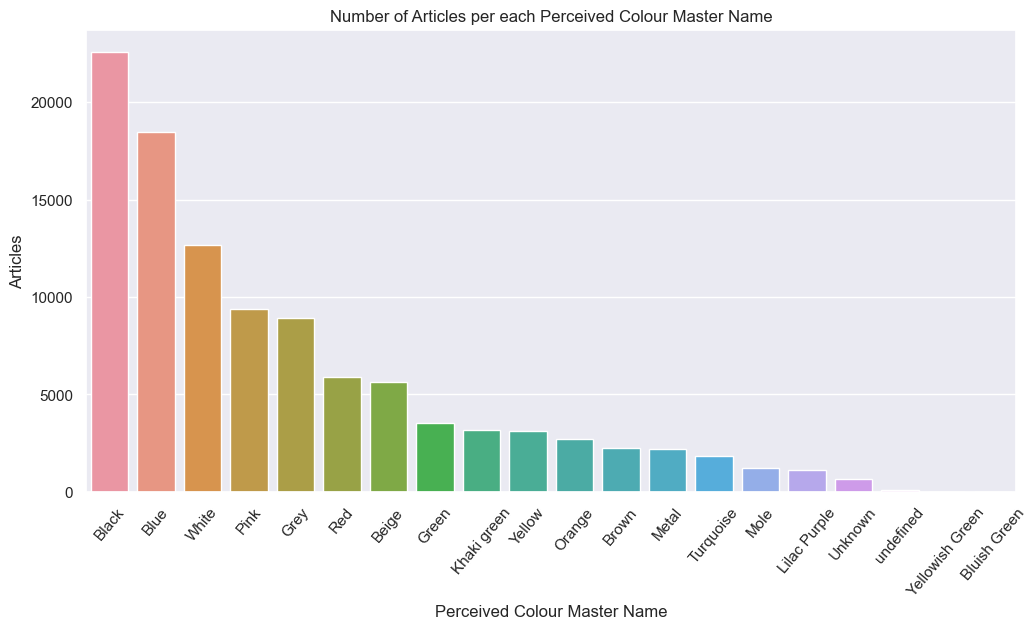

In [17]:
#Number of Articles per each Perceived Colour Master Name
temp = articles_df.groupby(["perceived_colour_master_name"])["article_id"].nunique()
df = pd.DataFrame({'Perceived Colour Master Name': temp.index,
                   'Articles': temp.values
                  })
df = df.sort_values(['Articles'], ascending=False)
plt.figure(figsize = (12,6))
plt.title(f'Number of Articles per each Perceived Colour Master Name')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Perceived Colour Master Name', y="Articles", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=50)
locs, labels = plt.xticks()
plt.show()

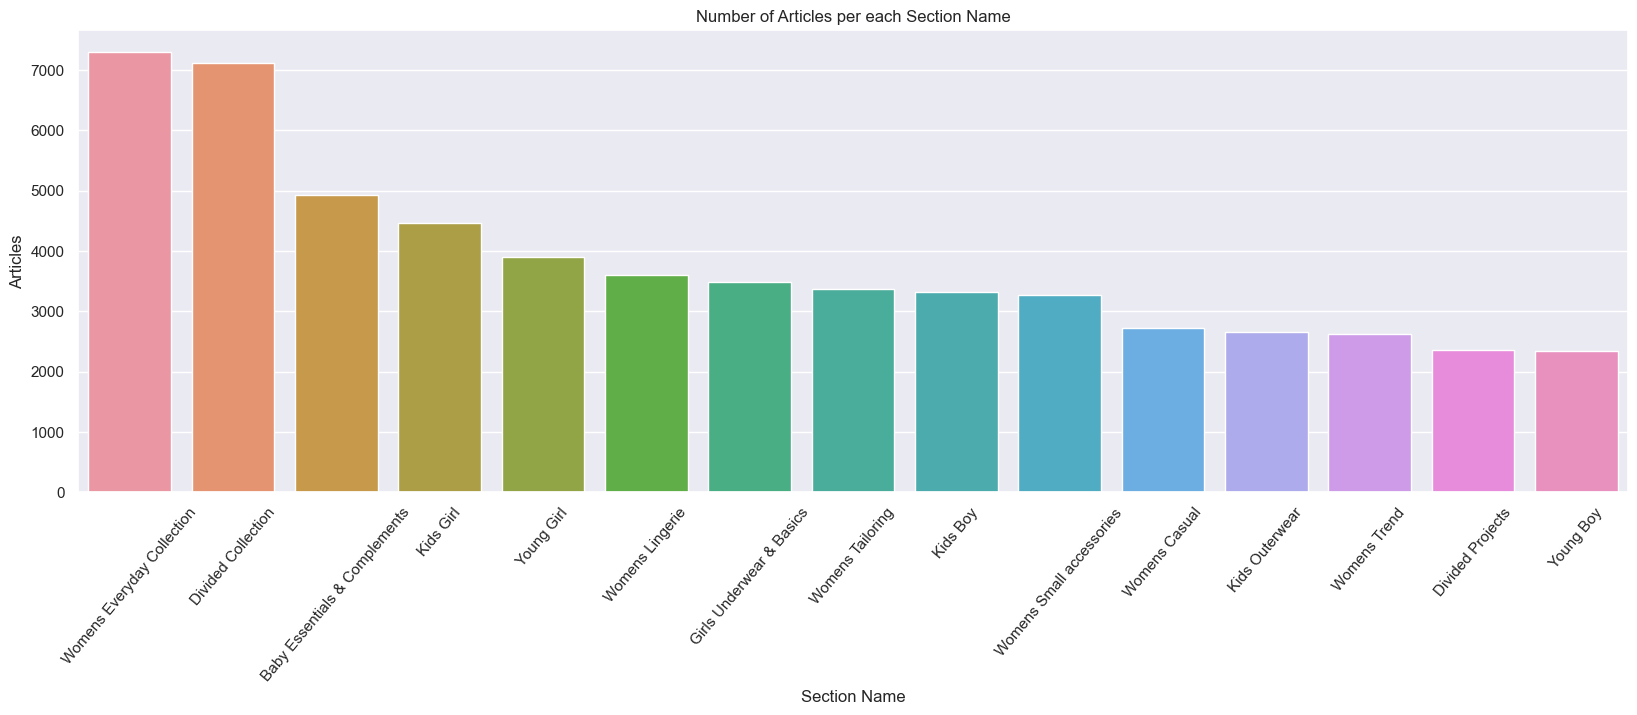

In [25]:
#Number of Articles per each Section Name
temp = articles_df.groupby(["section_name"])["article_id"].nunique()
df = pd.DataFrame({'Section Name': temp.index,
                   'Articles': temp.values
                  })
df = df.sort_values(['Articles'], ascending=False)[0:15]
plt.figure(figsize = (20,6))
plt.title(f'Number of Articles per each Section Name')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Section Name', y="Articles", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=50)
locs, labels = plt.xticks()
plt.show()


# def pie_chart(df, col_values, labels, ax, color, title):
#     n_classes = len(df)
#     explode = (0.1,) * n_classes # explode for 0.1 each slice
#     ax.pie(df[col_values],
#            colors=color, 
#            explode=explode,
#            labels=df[labels],
#            shadow=True)
#     ax.set_title(title, fontsize=16)

# temp = articles_df.groupby(["section_name"])["article_id"].nunique()
# df = pd.DataFrame({'Section Name': temp.index,'Articles': temp.values})
# df = df.sort_values(['Articles'], ascending=False)


# fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(22,10))
# color = plt.cm.PRGn(np.linspace(0, 1, len(df)))

# pie_chart(df.head(15),
#           'Articles', 
#           'Section Name',
#           axes, 
#           color,  
#           "Number of Articles per each Section Name (top 15)")  

## Customers

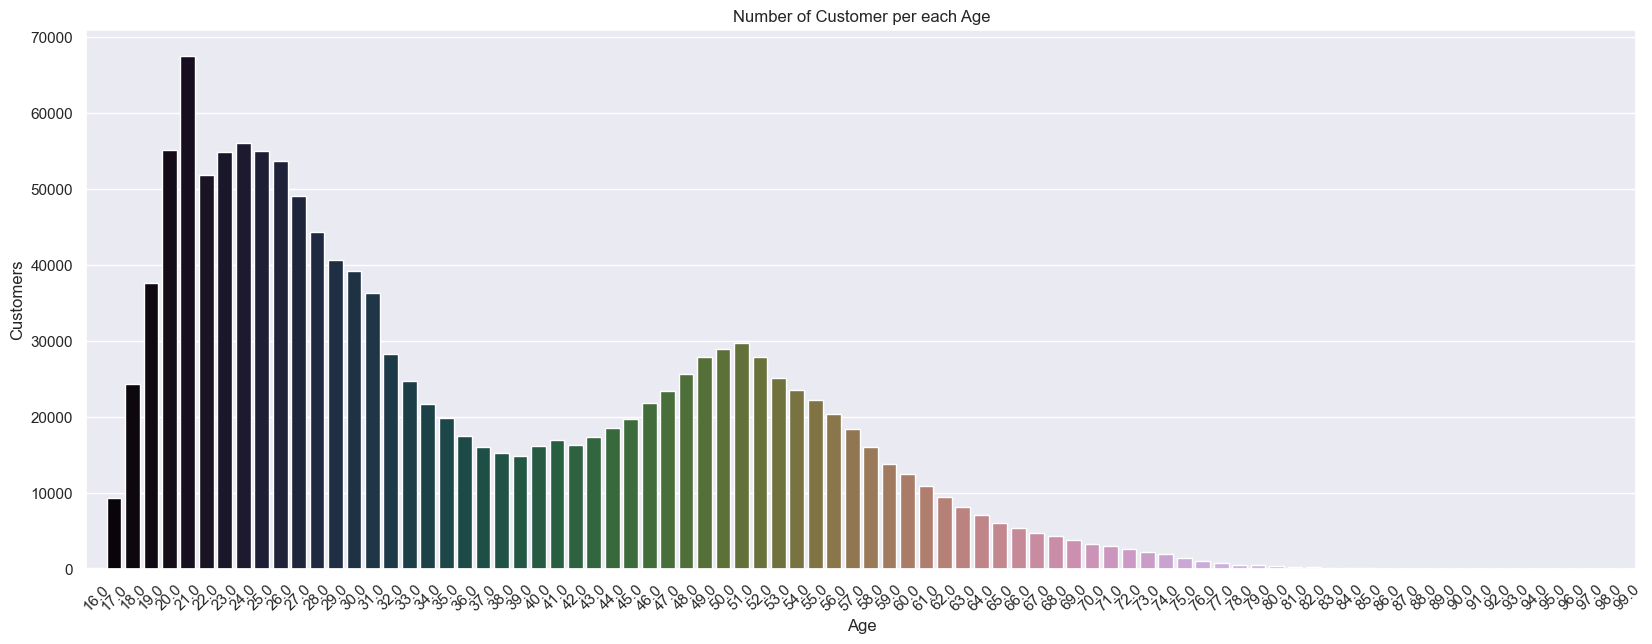

In [31]:
# Number of Customers per each Age
temp = customers_df.groupby(["age"])["customer_id"].count()
df = pd.DataFrame({'Age': temp.index,'Customers': temp.values})
df = df.sort_values(['Age'], ascending=False)
plt.figure(figsize=(20, 7))
plt.title("Number of Customer per each Age")
s = sns.barplot(x="Age", y="Customers", data=df, palette="cubehelix")
s.set_xticklabels(s.get_xticklabels(), rotation=45)
locs, labels = plt.xticks()
plt.show()

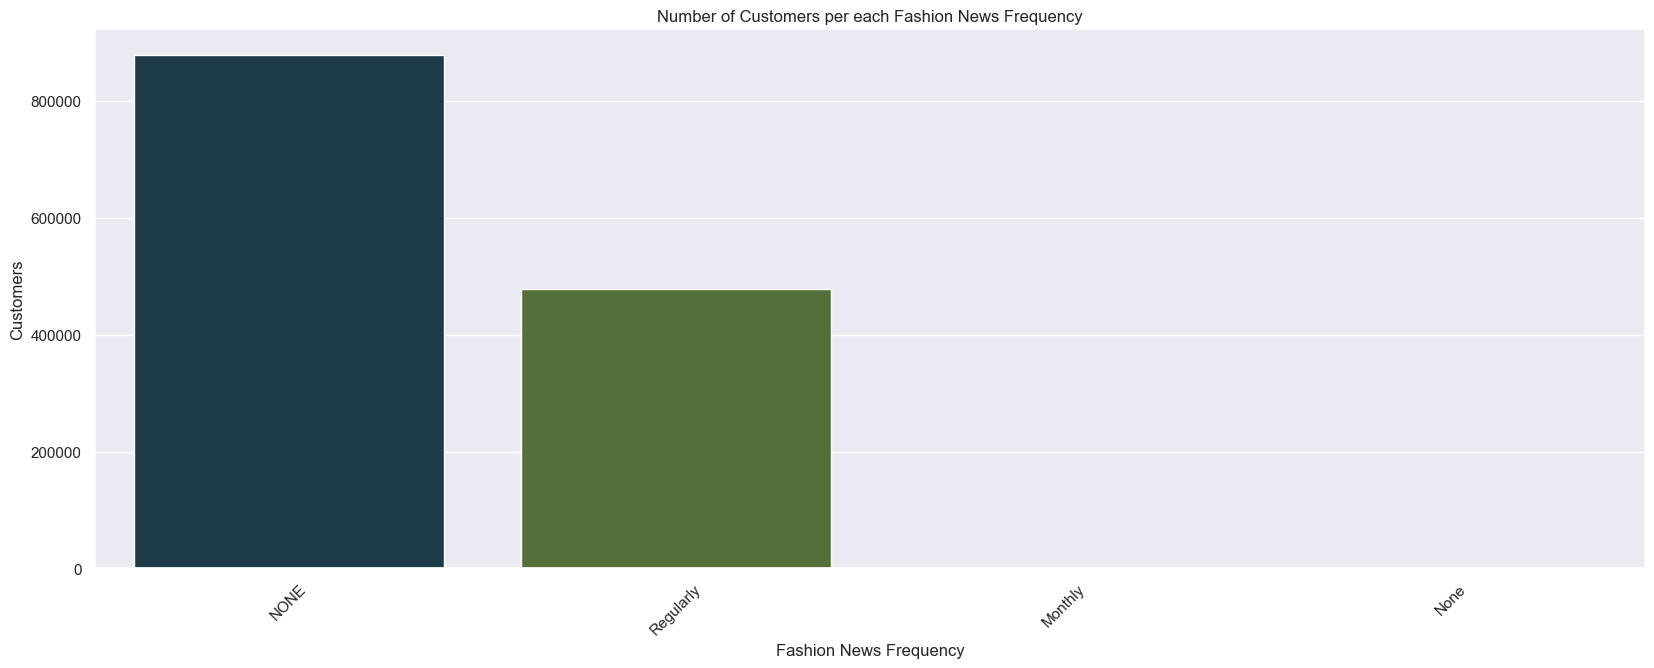

In [33]:
# Number of Customers per each Fashion News Frequency
temp = customers_df.groupby(["fashion_news_frequency"])["customer_id"].count()
df = pd.DataFrame({'Fashion News Frequency': temp.index,'Customers': temp.values})
df = df.sort_values(['Customers'], ascending=False)
plt.figure(figsize=(20, 7))
plt.title("Number of Customers per each Fashion News Frequency")
s = sns.barplot(x="Fashion News Frequency", y="Customers", data=df, palette="cubehelix")
s.set_xticklabels(s.get_xticklabels(), rotation=45)
locs, labels = plt.xticks()
plt.show()

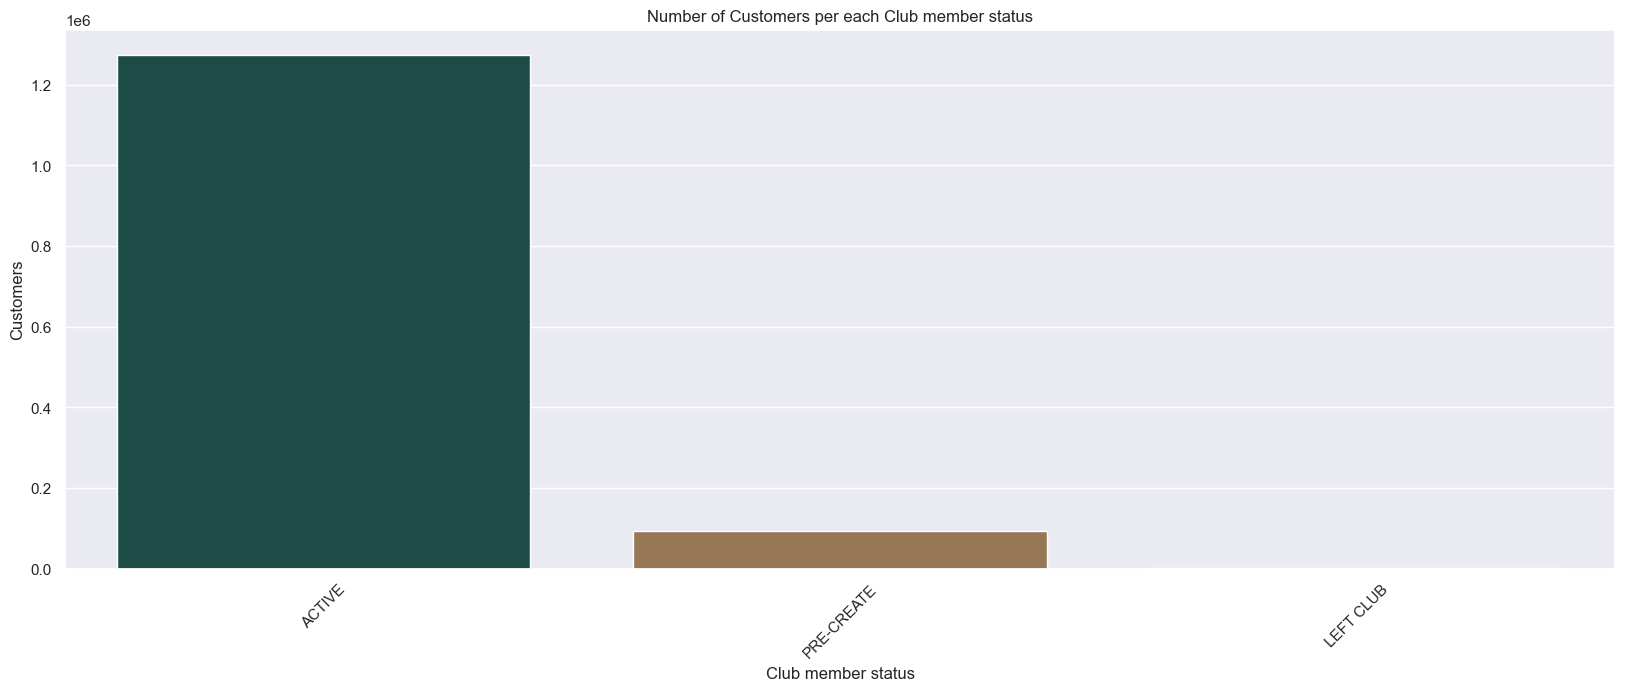

In [35]:
# Number of Customers per each Club Member Status
temp = customers_df.groupby(["club_member_status"])["customer_id"].count()
df = pd.DataFrame({'Club member status': temp.index,'Customers': temp.values})
df = df.sort_values(['Customers'], ascending=False)
plt.figure(figsize=(20, 7))
plt.title("Number of Customers per each Club member status")
s = sns.barplot(x="Club member status", y="Customers", data=df, palette="cubehelix")
s.set_xticklabels(s.get_xticklabels(), rotation=45)
locs, labels = plt.xticks()
plt.show()

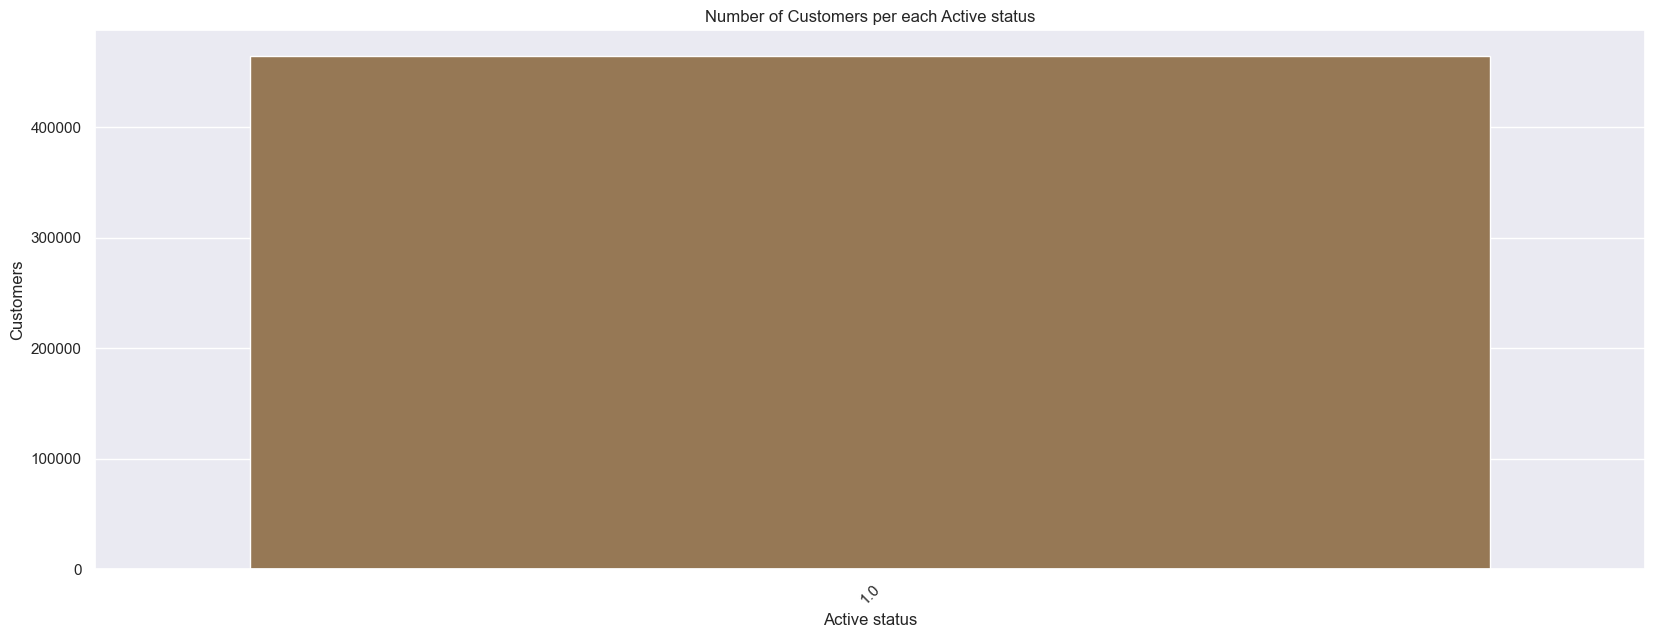

In [38]:
# Number of Customers per each Active status
temp = customers_df.groupby(["Active"])["customer_id"].count()
df = pd.DataFrame({'Active status': temp.index,'Customers': temp.values})
df = df.sort_values(['Customers'], ascending=False)
plt.figure(figsize=(20, 7))
plt.title("Number of Customers per each Active status")
s = sns.barplot(x="Active status", y="Customers", data=df, palette="cubehelix")
s.set_xticklabels(s.get_xticklabels(), rotation=45)
locs, labels = plt.xticks()
plt.show()